In [2]:
!pip install wordcloud
!pip install yake

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 3.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from transformers import pipeline
from yake import KeywordExtractor


In [4]:
df = pd.read_csv('bama_cars_filled.csv')
df = df.dropna(subset='Description')
df.isnull().sum()

,0
URL,0
Car Name,0
Car Year,0
Location,24
Price,127
Description,0
Mileage (KM),7
Engine Capacity (L),210
پیشرانه,236
Acceleration (s),585


In [6]:
# Load sentiment analysis model (Hugging Face pipeline)
sentiment_model = pipeline("text-classification", model="HooshvareLab/bert-fa-base-uncased-sentiment-digikala")

# YAKE for keyword extraction
kw_extractor = KeywordExtractor(lan="fa", n=2, top=5)

Device set to use cuda:0


In [7]:
def analyze_text(description):
    if pd.isna(description):
        return {"sentiment": None, "keywords": []}

    # Sentiment Analysis
    sentiment_result = sentiment_model(description)[0]['label']

    # Keyword Extraction
    keywords = kw_extractor.extract_keywords(description)
    extracted_keywords = [kw[0] for kw in keywords]

    return {"sentiment": sentiment_result, "keywords": extracted_keywords}

In [10]:
# Apply NLP tasks
df[['sentiment', 'keywords']] = df['Description'].apply(lambda x: pd.Series(analyze_text(x)))


In [17]:
df[['sentiment','keywords']]

,sentiment,keywords
0,not_recommended,[description]
1,not_recommended,"[صفر میباشد, ماشین, میباشد, صفر]"
2,not_recommended,[description]
3,recommended,"[تحویل روز, روز موجود, تحویل, نمایندگی, روز]"
4,recommended,"[⚜️اتو خطیب, ساعته ✅فروش, خطیب اصالت, امیری⭐️ ..."
...,...,...
1658,recommended,"[معاوضه نداره, رزومه کامل, کامل نمایندگی, لیسه..."
1659,not_recommended,"[خشک مدارک, مدارک آماده, آماده نقل, خشک, انتقال]"
1660,not_recommended,"[الماس خودرو, توضیح سالم, سالم نقد, نقد اقساط,..."
1661,no_idea,"[سند آماده, آماده انتقال, سند, انتقال, آماده]"


<ipython-input-11-fbb580a5dab9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette='coolwarm')


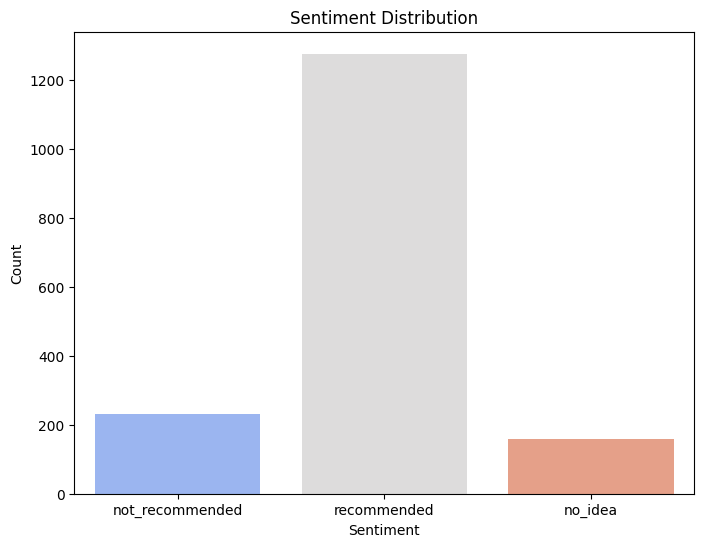

In [11]:
# Visualization
plt.figure(figsize=(8,6))
sns.countplot(x=df['sentiment'], palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


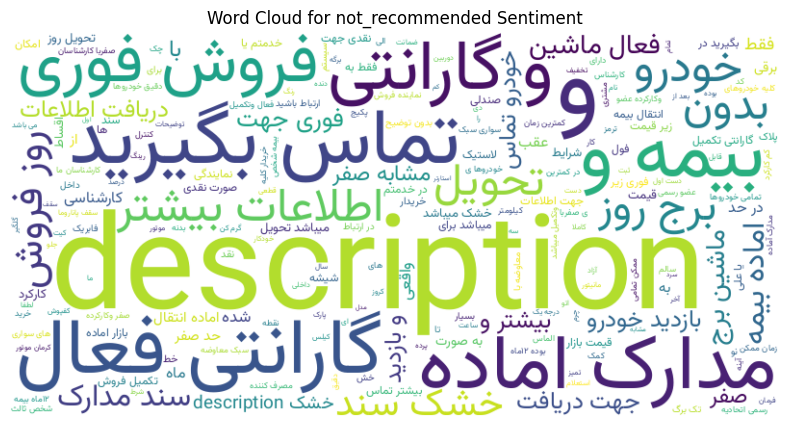

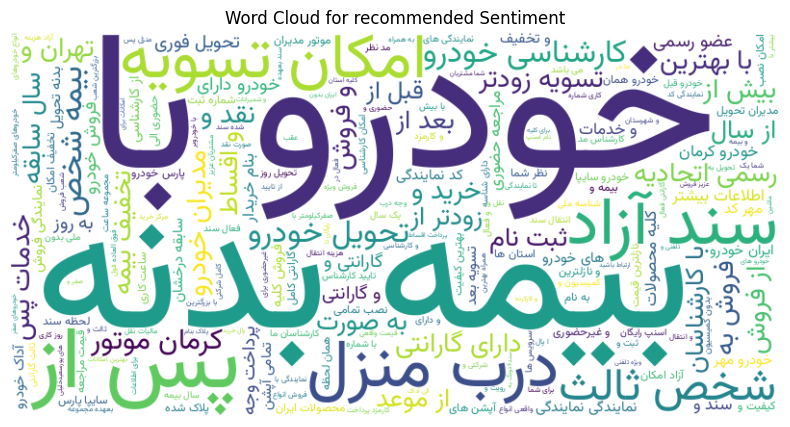

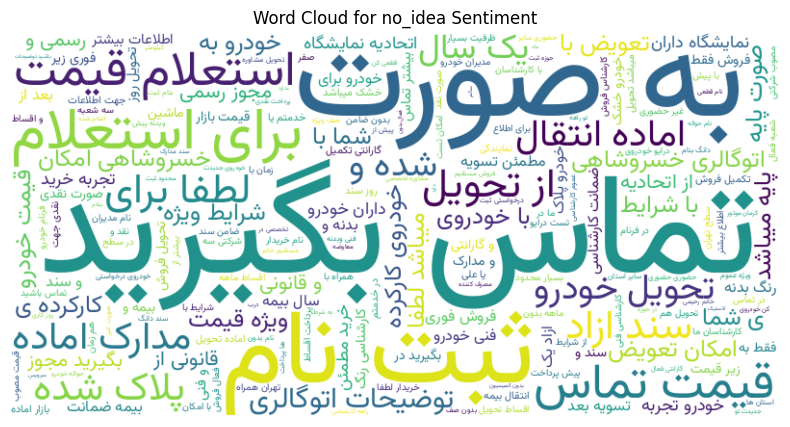

In [23]:
for sentiment in df['sentiment'].unique():
    text = " ".join(df[df['sentiment'] == sentiment]['Description'].dropna())
    wordcloud = WordCloud(font_path= '/content/Vazirmatn-Regular.ttf', width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()
